### A Crash Course on Quantum Simulation

#### Week 1. (Approx. 1 hour long)

##### What are we doing?

- A novel approach for wave mechanics
- Simulation of Hamiltonians and quantum simulation
- What is quantum physics? what is wave mechanics? Is there a way to distinguish the two?
- Hands on experience: Check certain quantum systems by building the analog version yourself!

## Introduction to Classical and Quantum Computing

### Classical computation: Digital
    Analog Level: discrete voltages, transistors, latches-memories, logic-gates
    Digital Level: input and desired output, the truth table, logic design, logic-gate implementation 
    
#### 1.1 Bits
If we represent the value of a bit as vectors instead of $0$ or $1$, then we can allocate two (orthogonal) vectors in Dirac bra-ket notation (next-week):
    $$0 \to \mid 0 \rangle  \equiv \begin{pmatrix} 1\\ 0 \end{pmatrix}, \quad 1  \to \mid 0 \rangle \equiv \begin{pmatrix} 0\\ 1 \end{pmatrix}.$$
    
Beware that we can simply use 0 or 1 instead of this vector notation. It is indeed true.  
    
The sampled signal $x(t) \to x[n]$. At each integer value of $n$, it is represented by either of $\mid 0 \rangle, \mid 1 \rangle$. Beware that each vector has integer elements.

We can -on the software level- talk about the logic gate o
perations now. Since the inputs are represented by vectors, the logic gates are matrices operating on the vectors.

Possible operations on a bit:

- NOT gate (reversable): $X = \begin{pmatrix} 0&1\\1 & 0 \end{pmatrix}$. The input it multiplied by $X$ and reversed, e.g. $X \mid 0 \rangle = \mid 1 \rangle$ and $X \mid 1 \rangle = \mid 0 \rangle$.

- Identity gate (reversable): $I = \begin{pmatrix} 1&0\\0&1 \end{pmatrix}$.

- 0-set (irreversable): Irrespective of the input, output is $\mid 0\rangle$. Represented by $\begin{pmatrix} 1&1\\0&0 \end{pmatrix}$. 

- 1-set (irreversable): Irrespective of the input, output is $\mid 1\rangle$.  Represented by $\begin{pmatrix} 0&0\\1&1 \end{pmatrix}$. 

#### 1.1 2-bits

Consider 2 bits, $\mid 00 \rangle,\mid 01 \rangle,\mid 10 \rangle,\mid 11 \rangle$. It is normally 2 parallel or series date. Yet, in order to find the connection with quantum computation, let us repsentate them again by the vectors.

$$\mid 00 \rangle = \mid 0 \rangle \mid 0 \rangle = \mid 0 \rangle \otimes \mid 0 \rangle = \begin{pmatrix} 1\\ 0 \end{pmatrix} \otimes \begin{pmatrix} 1\\ 0 \end{pmatrix} = \begin{pmatrix} 1\\0\\0\\ 0 \end{pmatrix},$$

$$\mid 01 \rangle = \mid 0 \rangle \mid 1 \rangle = \mid 0 \rangle \otimes \mid 1 \rangle = \begin{pmatrix} 1\\ 0 \end{pmatrix} \otimes \begin{pmatrix} 0\\ 1 \end{pmatrix} = \begin{pmatrix} 0\\1\\0\\ 0 \end{pmatrix},$$

$$\mid 10 \rangle = \mid 1 \rangle \mid 0 \rangle = \mid 1 \rangle \otimes \mid 0 \rangle = \begin{pmatrix} 0\\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1\\ 0 \end{pmatrix} = \begin{pmatrix} 0\\0\\1\\ 0 \end{pmatrix},$$

$$\mid 11 \rangle = \mid 1 \rangle \mid 1 \rangle = \mid 1 \rangle \otimes \mid 1 \rangle = \begin{pmatrix} 0\\ 1 \end{pmatrix} \otimes \begin{pmatrix} 0\\ 1 \end{pmatrix} = \begin{pmatrix} 0\\0\\0\\ 1 \end{pmatrix}.$$

2-bit operations, $f(x): \mathcal{Z}_2^2 \to \mathcal{Z}_2^1$. The input is 2 row vectors with bit values whereas the output is a single bit.
    
- AND gate (irreversable), $\wedge$: 

$$\mid 0 \rangle \wedge \mid 0 \rangle=\mid 0 \rangle \wedge \mid 1 \rangle=\mid 1 \rangle \wedge \mid 0 \rangle = \mid 0 \rangle.$$

$$\mid 1 \rangle \wedge \mid 1 \rangle \to \mid 1 \rangle.$$

How to represent them with operations? input is 2-bits, output is 1-bits, therefore, we need a matrix of size $2 \times 4$.

$$\wedge = \begin{pmatrix} 1&1&1&0\\0&0&0&1 \end{pmatrix}.$$

- OR gate (irreversable), $\lor$: 

$$\lor = \begin{pmatrix} 1&0&0&0 \\ 0&1&1&1\end{pmatrix}.$$

- XOR gate (irreversable), $\lor$: 

$$\lor = \begin{pmatrix} 1&0&0&0 \\ 0&1&1&1\end{pmatrix}.$$

- NAND gate (irreversable): Sequential application of AND and NOT gates.
- NOR gate (irreversable): Sequential application of OR and NOT gates.

In [27]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pylab import * # for plotting commands
import matplotlib.pyplot as plt
from IPython.display import Image
from mpl_toolkits.mplot3d import axes3d

#### 1.1 3+ bits:  
$\mid 000 \rangle,\mid 001 \rangle, ... ,\mid 110 \rangle,\mid 111 \rangle$.
Operations on 3+ bits are describable by 2 + 1 bit logic gates.

#### 2. Truth Table:
To generate the truth tables for logic functions, we use ttg library.

In [28]:
import ttg

For example, let us say, we have 3-inputs ($x,y,z$) and the following function $out = xy + z' = (x \wedge y)\lor \bar{z}$.

In [29]:
# inputs
print(ttg.Truths(['x', 'y', 'z']))

+-----+-----+-----+
|  x  |  y  |  z  |
|-----+-----+-----|
|  1  |  1  |  1  |
|  1  |  1  |  0  |
|  1  |  0  |  1  |
|  1  |  0  |  0  |
|  0  |  1  |  1  |
|  0  |  1  |  0  |
|  0  |  0  |  1  |
|  0  |  0  |  0  |
+-----+-----+-----+


In [30]:
print(ttg.Truths(['x', 'y', 'z'], ['(x and y) or (~z)']))

+-----+-----+-----+---------------------+
|  x  |  y  |  z  |  (x and y) or (~z)  |
|-----+-----+-----+---------------------|
|  1  |  1  |  1  |          1          |
|  1  |  1  |  0  |          1          |
|  1  |  0  |  1  |          0          |
|  1  |  0  |  0  |          1          |
|  0  |  1  |  1  |          0          |
|  0  |  1  |  0  |          1          |
|  0  |  0  |  1  |          0          |
|  0  |  0  |  0  |          1          |
+-----+-----+-----+---------------------+


Logic Circuit implementation:

- Given a truth table:
- Do Karnaugh Map simplification if possible and obtain a boolen expression
- Simplest: Use of sum of products method to obtain a boolean expression
- Use existing softwares, i.e. Xilinx to use physical units such as the field programmable gate arrays (FPGAs)

#### 3. Finite State Machines (FSM):
An abstract machine, a computational model that carry out boolean tasks. It is a collection of states (vectors describing a certain property) and how they are talking to each other as well as the inputs. There are two types depending on how the output is determined,
- Moore machine: Output depends only on the current states
- Mealy machine: Output depends on both the current states and the inputs


In [32]:
%%html 
<iframe src="https://ivanzuzak.info/noam/webapps/fsm_simulator" width="800" height="800"></iframe>

A computer and subunits of a computer are gigantic FSMs along with its all possible bits could be stored.

One can then build more complex structures out of buffers, latches, memories, CPU etc.

### Quantum Computation

Quantum mechanics tells us how a microscopic system evolve as a probabilistic wave. The operators are matrices, the wavefunction is a vector.

QM is reversable, therefore we will have reversable type of operations throughout, or we will make generalize the irreversable operations in classical computing to reversable. For example, the AND-gate is not a reversable logic gate, i.e. a possible outcome 0 could potentially be provided by three different input pairs, $00,01,10$. 

Q: How to achieve a reversable computation? A: Keeping the input as the additional bits during each operation. (see 2-qubit subsection)

Q: Why is it useful? A: If the computation is reversable, we must be able to carry out an operation in the opposite direction. It implies that the input bits must be kept.

Open Q: What about the intermediate states?

#### 1.1 Single QBit

A linear combination of two states of a bit: $\mid \psi \rangle = \alpha \mid 0 \rangle + \beta \mid 1 \rangle = \begin{pmatrix} \alpha \\ \beta \end{pmatrix}$. $\mid \alpha \mid^2$ probility to be in state $\mid 0 \rangle$ and $\mid \beta \mid^2$ probility to be in state $\mid 1 \rangle$.

In this respect, CBit is a special case of Qbit where $(\alpha,\beta) = (1,0)$ or $(0,1)$.



However, one can define unit vectors as a continuous function of angle $\phi = \tan^{-1}{\beta/\alpha}$ for each Q-bit.

Text(0.5, 1.0, 'Qbits - Cts Constellation')

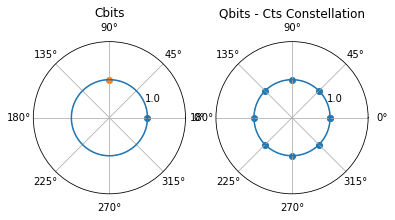

In [9]:
phi = 2 * sc.pi*linspace(0,1,101)
r   = ones((len(phi),))
 
fig, ax = plt.subplots(1,2,subplot_kw={'projection': 'polar'})
ax[0].plot(phi, r)
ax[0].set_rmax(1.4)
ax[0].set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks

ax[0].scatter(0, 1.)
ax[0].scatter(pi/2, 1.)
ax[0].set_title("Cbits")

pts = 2 * pi*linspace(0,1,9)
ax[1].plot(phi, r)
ax[1].set_rmax(1.4)
ax[1].set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks

ax[1].scatter(pts, ones((len(pts),)))
ax[1].set_title("Qbits - Cts Constellation")

Here, we assumed real valued coefficients, but they are actually defined as complex numbers. Thereby, the states live on the unit sphere, known as the Bloch sphere.

In this respect, the Q-logic gate operations can be viewed as the rotations on a Bloch sphere from on location to another. We will come back to this point below at (*).

Amony the 1-bit operators, only identity and NOT are reversable.

- NOT gate is denoted as $X$-gate, the Pauli X matrix.

$$X = \begin{pmatrix} 0&1 \\ 1 & 0 \end{pmatrix} \quad \to \quad \begin{pmatrix} 0&1 \\ 1 & 0 \end{pmatrix}  \begin{pmatrix} \alpha \\ \beta \end{pmatrix} = \begin{pmatrix} \beta \\\alpha \end{pmatrix}.$$

It reverses the coefficients of a Qbit.

Text(0.5, 1.0, 'NOT gate')

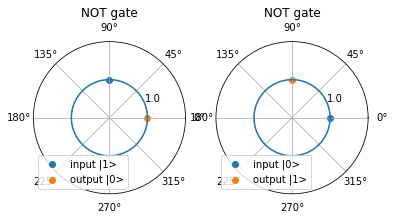

In [10]:
X = np.array([[0.,1.],[1.,0.]],dtype='double')
input1 = [0.,1.]
output1 = dot(X,input1)

input2 = [1.,0.]
output2 = dot(X,input2)

phi = 2 * pi*linspace(0,1,101)
r   = ones((len(phi),))
 
fig, ax = plt.subplots(1,2,subplot_kw={'projection': 'polar'})
ax[0].plot(phi, r)
ax[0].set_rmax(1.4)
ax[0].set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks

ax[0].scatter(arctan(input1[1]/(input1[0]+1e-31)), norm(input1), label="input |1>")
ax[0].scatter(arctan(output1[1]/(output1[0]+1e-31)), norm(output1), label="output |0>")
ax[0].legend(loc="lower left")
ax[0].set_title("NOT gate")

ax[1].plot(phi, r)
ax[1].set_rmax(1.4)
ax[1].set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks

ax[1].scatter(arctan(input2[1]/(input2[0]+1e-31)), norm(input2), label="input |0>")
ax[1].scatter(arctan(output2[1]/(output2[0]+1e-31)), norm(output2), label="output |1>")
ax[1].legend(loc="lower left")
ax[1].set_title("NOT gate")

- A very important gate: Hadamard gate
$$H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1&1 \\ 1 & -1 \end{pmatrix}, $$

$$H \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix}, \quad H \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -1 \end{pmatrix}.$$

It generates a linear combination of bits. When applied 2-times, because the it is its own inverse, it provides the original input. $H^2 = I$. 

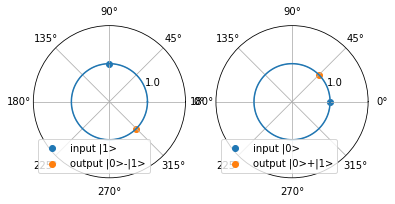

In [11]:
Had = np.array([[1.,1.],[1.,-1.]],dtype='double')/sqrt(2)
input1 = [0.,1.]
output1 = dot(Had,input1)

input2 = [1.,0.]
output2 = dot(Had,input2)

phi = 2 * pi*linspace(0,1,101)
r   = ones((len(phi),))
 
fig, ax = plt.subplots(1,2,subplot_kw={'projection': 'polar'})
ax[0].plot(phi, r)
ax[0].set_rmax(1.4)
ax[0].set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks

ax[0].scatter(arctan(input1[1]/(input1[0]+1e-31)), norm(input1), label="input |1>")
ax[0].scatter(arctan(output1[1]/(output1[0]+1e-31)), norm(output1), label="output |0>-|1>")
ax[0].legend(loc="lower left")

ax[1].plot(phi, r)
ax[1].set_rmax(1.4)
ax[1].set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks

ax[1].scatter(arctan(input2[1]/(input2[0]+1e-31)), norm(input2), label="input |0>")
ax[1].scatter(arctan(output2[1]/(output2[0]+1e-31)), norm(output2), label="output |0>+|1>")
ax[1].legend(loc="lower left")

From a QM perspective, it is the diagonalizing matrix for the pauli X matrix, NOT gate $X$.

In [ ]:
Homework:
    - Deustche algorithm

#### 1.2 2-Qbit

Tensor product of vectors:
    $$\left( \alpha \mid \alpha_1 \rangle + \beta \mid \beta_1 \rangle \right)\left( \alpha \mid \alpha_2 \rangle + \beta \mid \beta_2 \rangle \right) =\begin{pmatrix} \alpha_1 \\ \beta_1 \end{pmatrix} \otimes \begin{pmatrix} \alpha_2 \\ \beta_2 \end{pmatrix} = \begin{pmatrix} \alpha_1 \begin{pmatrix} \alpha_2 \\ \beta_2 \end{pmatrix} \\ \beta_1 \begin{pmatrix} \alpha_2 \\ \beta_2 \end{pmatrix} \end{pmatrix} = \begin{pmatrix} \alpha_1 \alpha_2\\ \alpha_1 \beta_2 \\ \beta_1 \alpha_1 \\ \beta_1 \beta_2 \end{pmatrix}.$$
    
Sometimes use the notation, $\mid 3 \rangle = \mid 11 \rangle$ and $\mid 4 \rangle = \mid 100 \rangle$. 

Therefore, to represent a arbitrary state say, $\mid 125 \rangle$, one need $n$ digits or $n$ tensor product of vectors where $n$ is the smallest integer satisfying $2^n-1\ge 125$. Hence, $n=7.$

- C-not gate: An analogous NAND gate in quantum computing. 

$$CNOT = \begin{pmatrix} 1&0&0&0 \\0&1&0&0\\ 0&0&0&1 \\ 0&0&1&0 \end{pmatrix}$$

It acts on 2-Qbit vectors. The first bit determines the operation on the second bit.
If the first bit is 1, then the second bit is reversed, otherwise the second bit remains the same. For example,
$$CNOT \mid 1 0 \rangle =  \begin{pmatrix} 1&0&0&0 \\0&1&0&0\\ 0&0&0&1 \\ 0&0&1&0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1&0&0&0 \\0&1&0&0\\ 0&0&0&1 \\ 0&0&1&0 \end{pmatrix} \begin{pmatrix} 0 \\0\\ 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\0\\ 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \mid 1 1 \rangle$$


##### - At this stage, it may vey well look like "we have bunch of matrices to be multiplied and one somehow yield desired output". It is totally OK. 

#### Some fun with Qiskit Library

In [12]:
from qiskit import QuantumCircuit

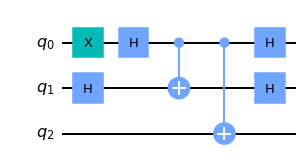

In [33]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

# Add X and H gate on qubit 0, putting this qubit in superposition.,
circ.x(0)
circ.h(0)
circ.h(1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

circ.h(0)
circ.h(1)

circ.draw('mpl')

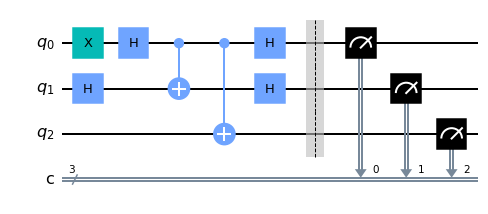

In [14]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before)
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(3), front=True)

#drawing the circuit
qc.draw('mpl')

### Shor's Integer Factoring Algorithm

Note that this section is borrowed from the IBM Quiskit website, "Shor's Algorithm" on 22.03.22 and can be accessed from: https://qiskit.org/textbook/ch-algorithms/shor.html

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
print("Imports Successful")

Imports Successful


Quantum algorithm: A period finding algorithm of a function mod $N$:
    $$f(x) = a^x (mod-N)$$

Basically, search for a mutually prime pair quest can be mapped into a period finding algorithm for exponential functions. Beware that a real valued single exponential is not periodic but its reminder by division with a number, say N.

In [34]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

Let us use 8 counting q-bits

In [35]:
# Specify variables
n_count = 8  # number of counting qubits
a = 7

Quantum Fourier transform unit:

In [36]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

We now have, unitary logic gates and all other black-boxes. We can now create the circuit for Shor's algorithm.

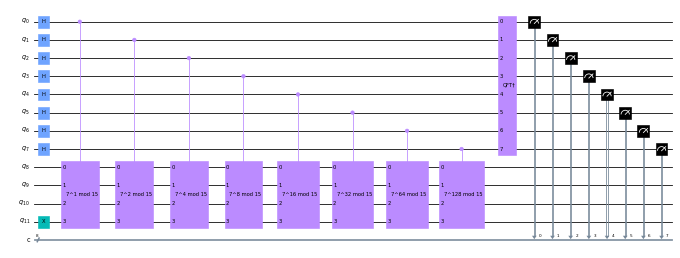

In [37]:
# Create QuantumCircuit with n_count counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(n_count + 4, n_count)

# Initialize counting qubits
# in state |+>
for q in range(n_count):
    qc.h(q)
    
# And auxiliary register in state |1>
qc.x(3+n_count)

# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])

# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count))

# Measure circuit
qc.measure(range(n_count), range(n_count))
qc.draw(output='mpl',fold=-1, scale=0.4)  # -1 means 'do not fold' 

Let us also do an experiment and make a measurement:

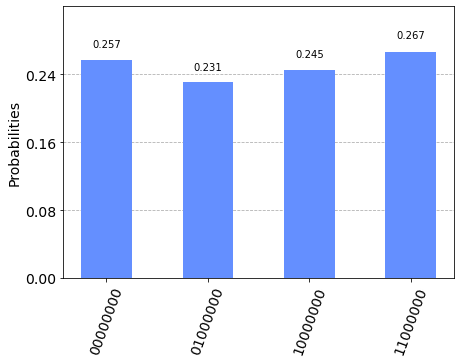

In [38]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

The results are for 8 qubits and x-axis represent these bits.

### References
- Microsoft Research, video lectures: https://www.youtube.com/watch?v=F_Riqjdh2oM Retrieved on 13.03.22
- IBM Qiskit, tutorials https://qiskit.org/documentation/tutorials.html Retrieved on 13.03.22